In [63]:
import SMF_BCD as SMF
import numpy as np
from util.plotting import *

In [65]:
X = np.loadtxt("Output/A.txt")
Y = np.loadtxt("Output/y.txt")[:, np.newaxis]
Xtest = np.loadtxt("Output/At.txt")
Ytest = np.loadtxt("Output/yt.txt")[:, np.newaxis]

print(f"Caltech: {np.sum(X[:,:1000])}")
print(f"UCLA: {np.sum(X[:,1001:])}")

Caltech: 197976.0
UCLA: 212254.0


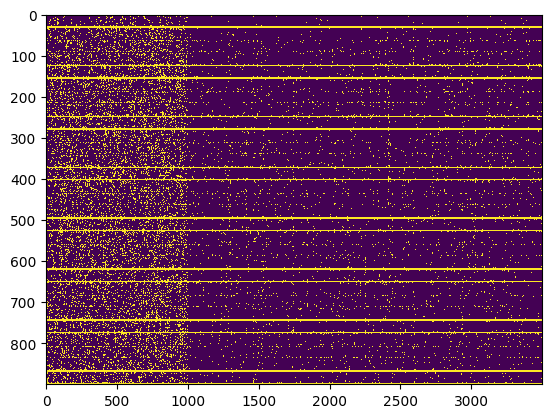

In [66]:
plt.imshow(X, interpolation='nearest', aspect='auto')

In [67]:
SMF_Train = SMF.SDL_BCD([X, Y.T], X_test=[Xtest, Ytest.T], xi=5, n_components=16)

initial loading beta [[-0.46643019  0.80973464  0.7849475   0.14387551  0.45792071  0.09731336
  -0.0016727  -0.8779664  -0.56353267  0.91687161 -0.3194357   0.95896929
   0.45979297 -0.91900372  0.61447223 -0.13414624 -0.7959492 ]]


In [68]:
results_dict_new = SMF_Train.fit(iter=250, subsample_size=None, option = "filter",# search_radius_const=200*np.linalg.norm(X),
                                if_compute_recons_error=True, if_validate=True)

  0%|          | 1/250 [00:00<03:29,  1.19it/s]

--- Training --- [threshold, AUC] =  [0.678, 0.999]
--- Iteration 0: Training loss --- [Data, Label, Total] = [257239.924830.3, 139.210005.3, 1286338.834155.3]


  4%|▍         | 10/250 [00:06<02:21,  1.70it/s]

--- Training --- [threshold, AUC] =  [0.651, 0.999]
--- Iteration 10: Training loss --- [Data, Label, Total] = [170615.597832.3, 129.418438.3, 853207.407597.3]
!!! pred_type filter


  4%|▍         | 11/250 [00:08<04:06,  1.03s/it]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.651, 0.999, 0.989, 0.992]


  8%|▊         | 20/250 [00:12<02:03,  1.87it/s]

--- Training --- [threshold, AUC] =  [0.665, 0.999]
--- Iteration 20: Training loss --- [Data, Label, Total] = [164788.386400.3, 126.010517.3, 824067.942515.3]
!!! pred_type filter


  8%|▊         | 21/250 [00:14<03:31,  1.08it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.665, 0.999, 0.989, 0.993]


 12%|█▏        | 30/250 [00:17<01:26,  2.55it/s]

--- Training --- [threshold, AUC] =  [0.649, 0.999]
--- Iteration 30: Training loss --- [Data, Label, Total] = [161364.944579.3, 124.455918.3, 806949.178815.3]
!!! pred_type filter


 12%|█▏        | 31/250 [00:19<03:07,  1.17it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.649, 0.999, 0.989, 0.993]


 16%|█▌        | 40/250 [00:22<01:02,  3.38it/s]

--- Training --- [threshold, AUC] =  [0.641, 0.999]
--- Iteration 40: Training loss --- [Data, Label, Total] = [159460.269484.3, 124.221610.3, 797425.569033.3]
!!! pred_type filter


 17%|█▋        | 42/250 [00:24<02:03,  1.69it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.641, 0.999, 0.99, 0.993]


 20%|██        | 50/250 [00:26<00:57,  3.46it/s]

--- Training --- [threshold, AUC] =  [0.625, 0.999]
--- Iteration 50: Training loss --- [Data, Label, Total] = [158165.882991.3, 123.590089.3, 790953.005044.3]
!!! pred_type filter


 20%|██        | 50/250 [00:28<01:53,  1.76it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.625, 0.999, 0.99, 0.993]
!!! --- Validation (Stopped) --- [threshold, ACC] =  [0.625, 0.99]
!!! pred_type filter


In [69]:
W = results_dict_new.get('loading')[0]
print(f"Shape of dictionaries: {W.shape}")
beta = results_dict_new.get('loading')[1]
print(f"Shape of regression coefficients: {beta.shape}")

Shape of dictionaries: (900, 16)
Shape of regression coefficients: (1, 17)


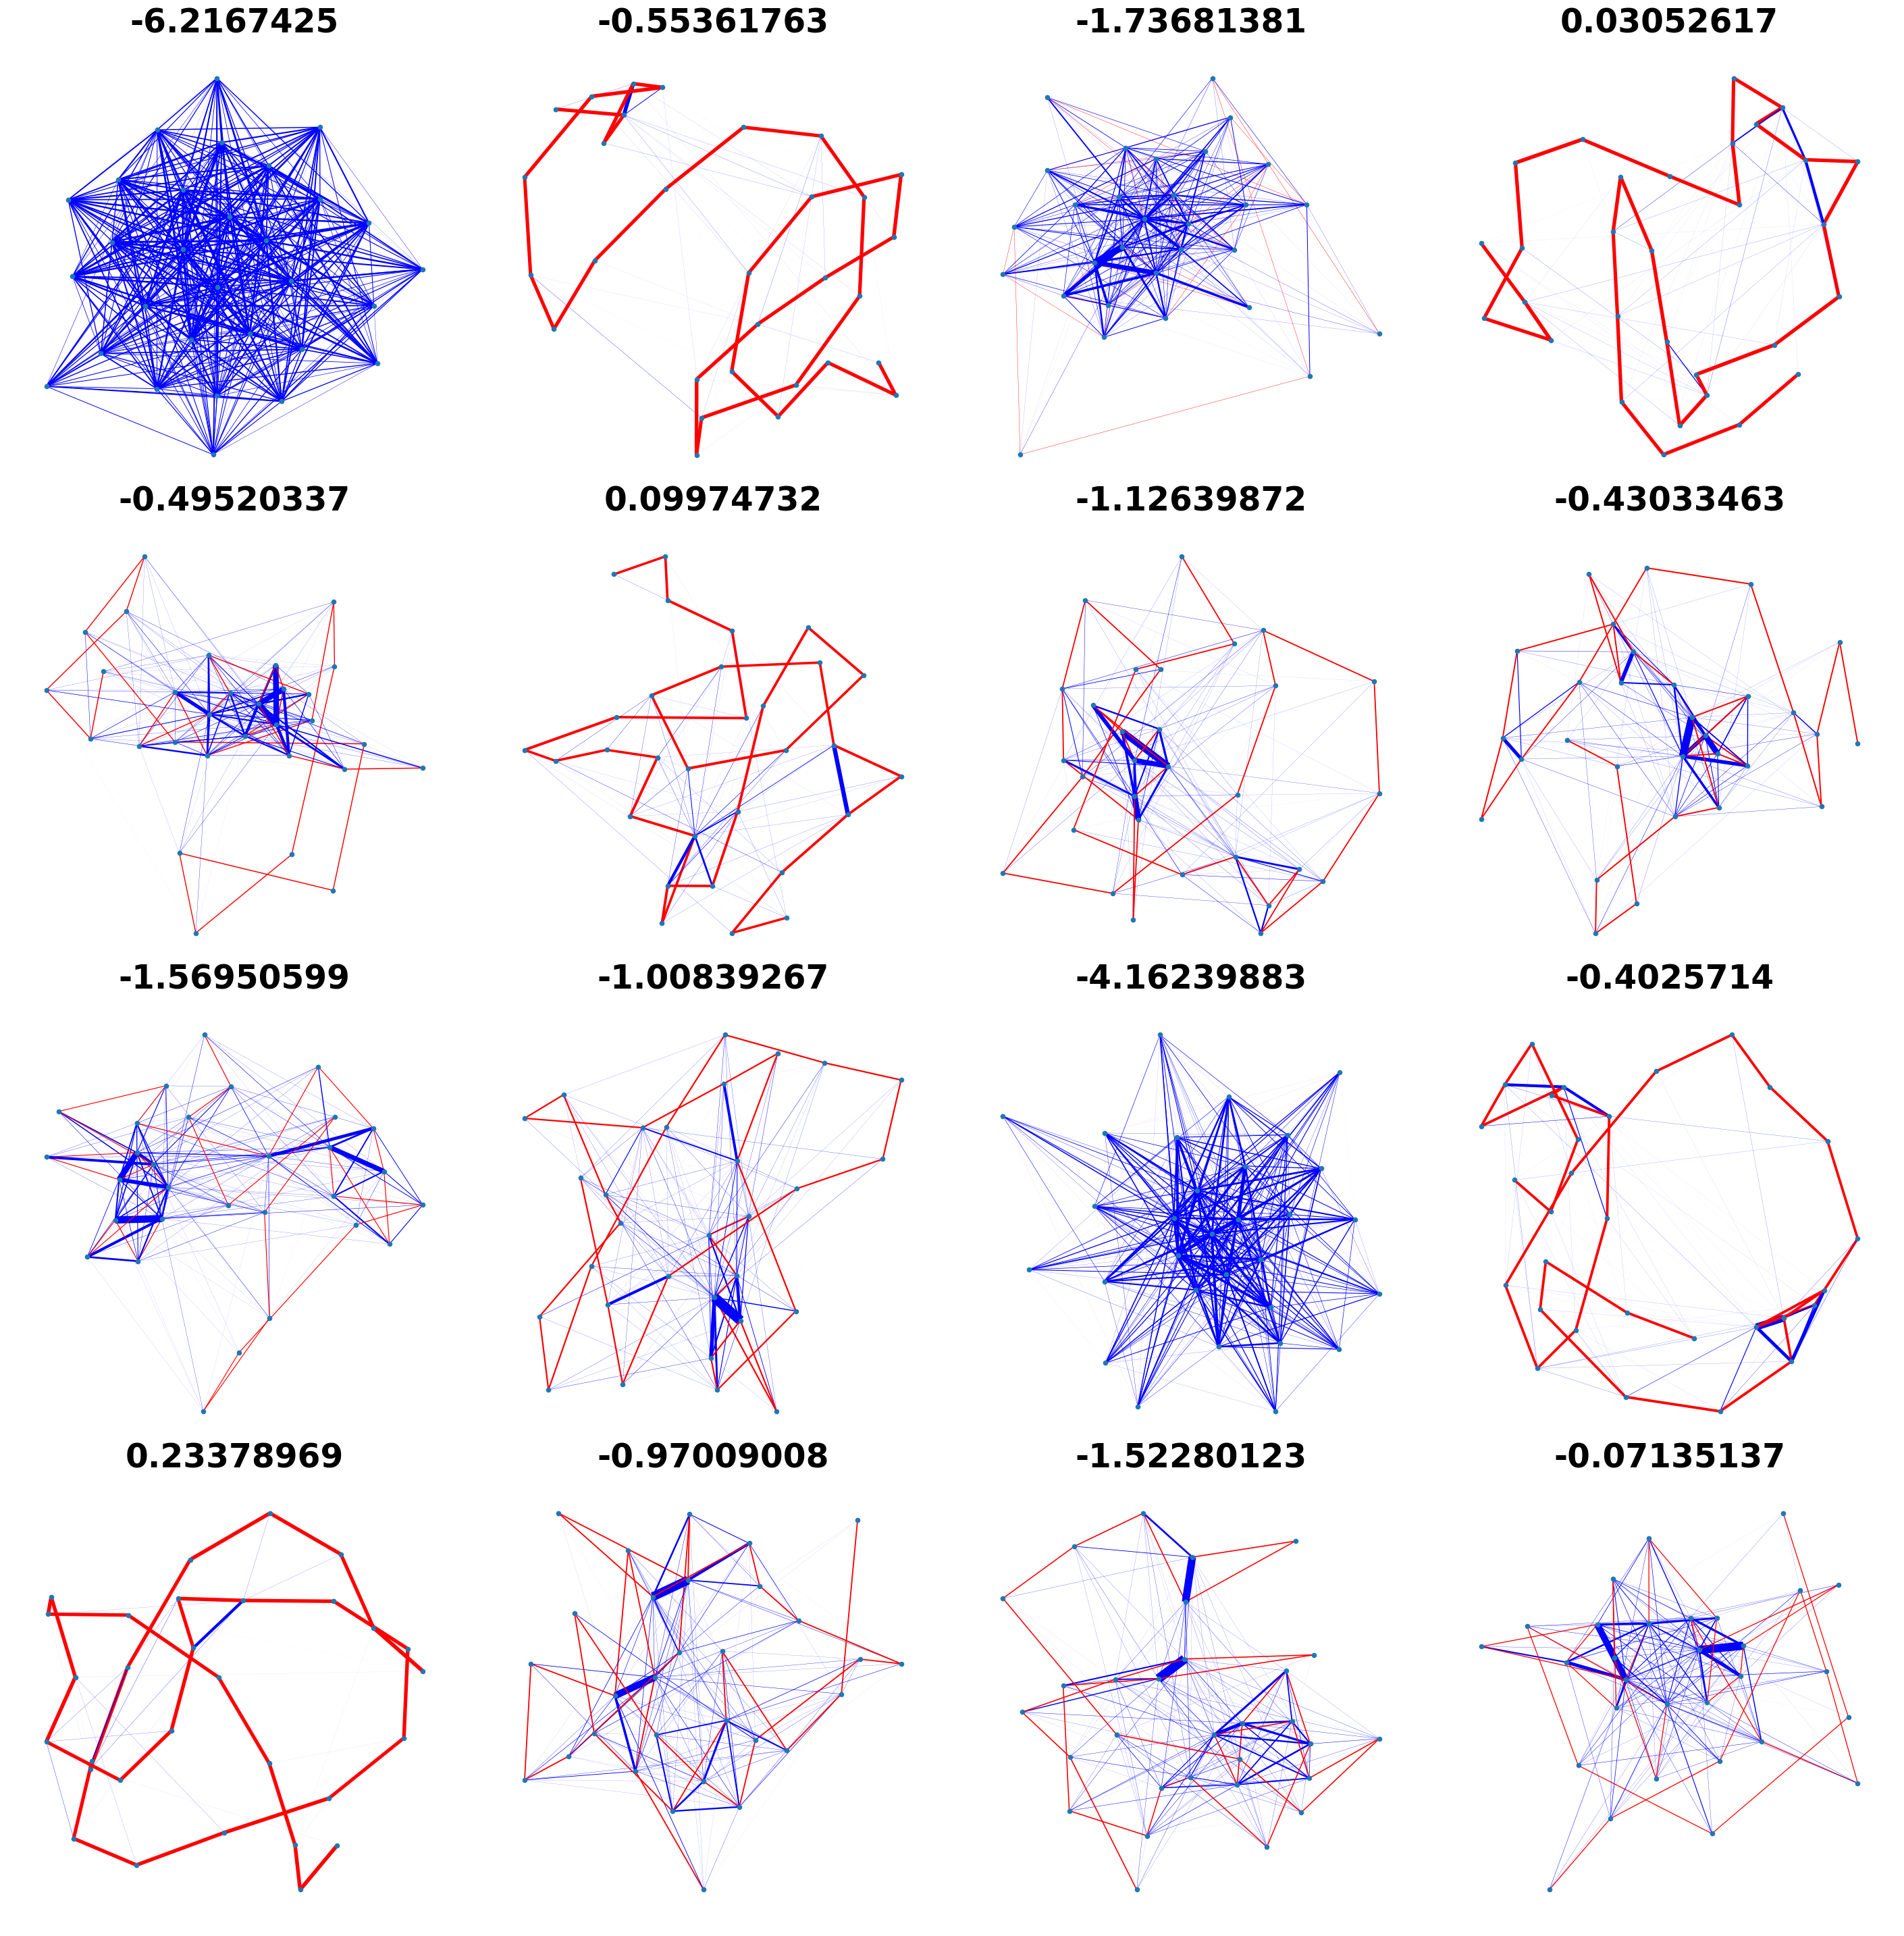

In [70]:
## Visualize dictionaries
display_dict_and_graph(save_path='Output/Cal_UCLA_1000_2500', W=W, regression_coeff=beta.T, fig_size=[35,35], plot_graph_only=True)

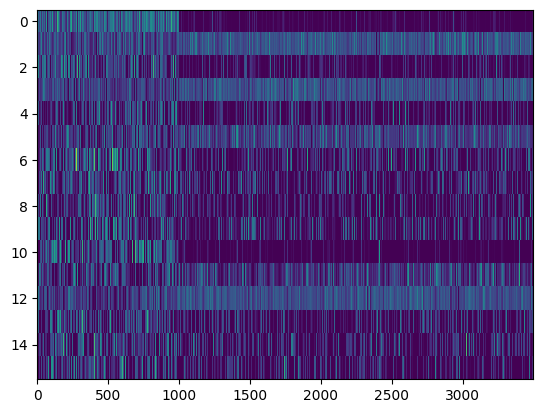

In [71]:
plt.imshow(results_dict_new.get('code'), interpolation='nearest', aspect='auto')

In [72]:
beta

array([[15.18898551, -6.2167425 , -0.55361763, -1.73681381,  0.03052617,
        -0.49520337,  0.09974732, -1.12639872, -0.43033463, -1.56950599,
        -1.00839267, -4.16239883, -0.4025714 ,  0.23378969, -0.97009008,
        -1.52280123, -0.07135137]])

In [73]:
W

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.63442801e-02, 2.99218818e-03, ...,
        1.34107194e-02, 1.09442218e-02, 9.57069610e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 2.11102179e-02, ...,
        0.00000000e+00, 8.02331794e-02, 0.00000000e+00],
       [0.00000000e+00, 3.72700245e-02, 3.18785199e-03, ...,
        1.31156106e-02, 1.20106387e-02, 9.12145876e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.71387413e-11, 0.00000000e+00]])

In [121]:
X = np.loadtxt("Output/A_mh.txt")

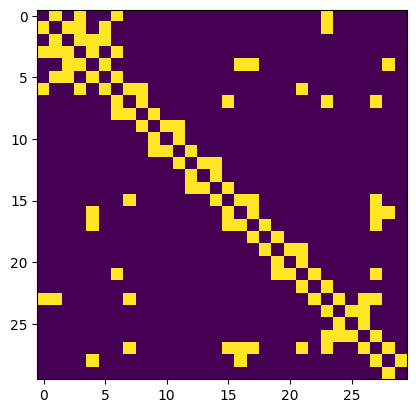

In [127]:
plt.imshow(X[:,1001].reshape(30,30), interpolation='nearest')

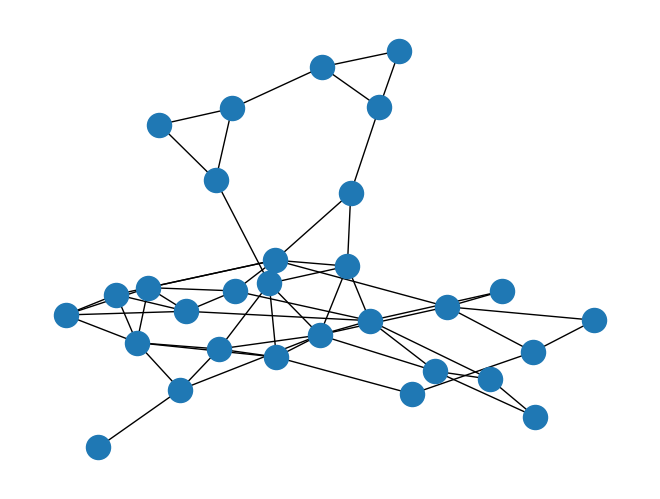

In [132]:
G = nx.from_numpy_array(X[:,1001].reshape(30,30))
nx.draw(G)

In [133]:
W.T @ X[:,1001]

array([0.39047021, 2.26973542, 0.50233865, 2.20573613, 0.9935445 ,
       1.65526514, 0.8046904 , 0.86471399, 0.89955776, 1.20338215,
       0.35820416, 1.66502898, 2.29086956, 0.93406688, 0.78542655,
       0.74226603])

In [134]:
a = beta[:,1:] @ W.T @ X[:,1001] + beta[:,0]
a

array([2.68823208])

In [135]:
1/(1+np.exp(-a))

array([0.93632866])

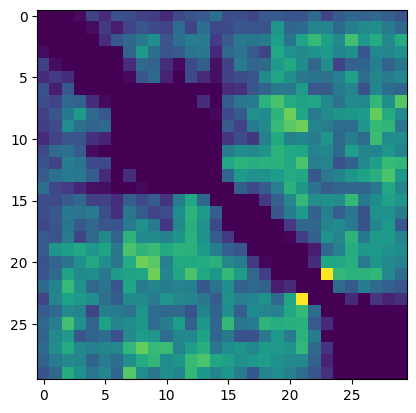

In [83]:
plt.imshow(W[:,0].reshape(30,30), interpolation='nearest')

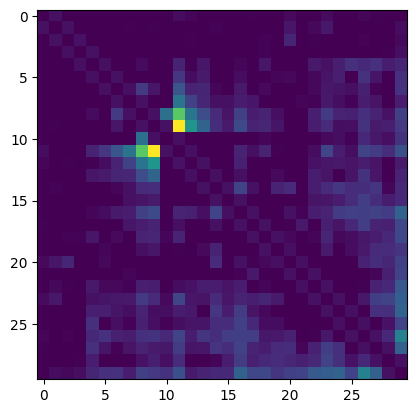

In [85]:
plt.imshow(W[:,2].reshape(30,30), interpolation='nearest')